In [2]:
from IPython.html import widgets
from IPython.display import display
from math import exp, sqrt, pi
import scipy.optimize
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set_context('notebook', font_scale=1.25)
seaborn.set_style('whitegrid')

/opt/conda/envs/python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# "Tea Time"#

### $\quad \quad$ Application of Newton's Law of Cooling###

<p style='text-align:right'>**April 21st, 2015**</p>


## Abstract##

Many tea enthusiasts and vendors recommend specific steeping temperatures for different kinds of teas. However, the average tea-drinker has a kettle with one temperature setting - boiling - and variable temperature tea kettles can cost upwards of \$200. One more frugal solution is to bring the water to a boil and then wait for it to cool to the appropriate temperature. I intend to use Python to model Newton’s Law of Cooling, $T(t) = T_a + (T_0 - T_a) e^{-rt}$, for a standard 1.7L stainless steel kettle. This equation will create a model that takes a time value and outputs the temperature that the water will be at that time. The optimal time to wait before steeping can then be found by finding the intersection of the equation with a user-specified temperature, or by inputting the type of tea, for which the brewing temperature will be stored in a  dictionary. After the initial model is complete, additions can be made to allow the user input the names of specific brand names of tea, which opens up the scope of this project to commercial applications.

##N ewton's Law of Cooling##

Combining Fourier's Law, $\frac{dQ}{dt}=hAT(t)$, and the knowledge that $Q = CT$, we can solve the differential equation for $T(t)$ to yield

$$T(t) = T_a + (T_0 - T_a) e^{-rt} \quad r = \frac{hA}{mc_p}$$

where $T(t)$ is the temperature at a given time, $T_a$ is the ambient temperature, $T_0$ is the initial temperature, $h$ is a constant specific to the kettle material, $A$ is the surface area of transfer, $m$ is the mass of the water, and $c_p$ is the coefficient of heat transfer, specific to the boiling water. The above equation is Newton's Law of Cooling. The equation shows an exponential relationship between time and temperature. The rate of cooling is fast in the beginning, and slows as time goes on until the water reaches ambient temperature. 

Below is an example graph of Newton's Law. 

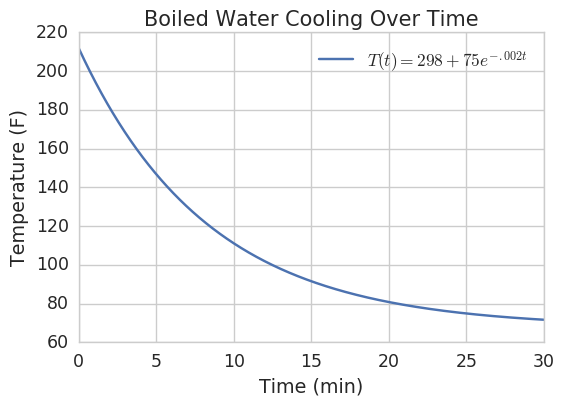

In [3]:
T = 373.
T_a = 293.
r = .002

def cooling_eqn(t):
    return (T_a + (T - T_a) * np.exp(-r * t)) * 9./5. - 459.67

x = np.array(range(1800))

cooling_plot = plt.plot(x / 60., cooling_eqn(x), label='$T(t) = 298 + 75e^{-.002t}$')
plt.title('Boiled Water Cooling Over Time')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (F)')
plt.legend(loc='upper right')
plt.show()

## Calculating $r$

### Overall Heat Transfer Coefficient###

The paper "A physical description of coffee cooling in a pot" by Czech scientists Jan Sedlacek and Jiri Dolejsi provides an experimentally determined parameter $k$, or $hA$, for a china coffee pot. They later report that the china pot and a metal pot of similar size lose heat at similar rates. For the sake of this project, I am going to use the $k$-value for the Newton's Law system that is modeled in this paper. The $k$-value is $0.54 \, \frac{J}{s \, K}$.

In [4]:
k = .54
h_mug = 4.5 * .0254  # height in meters
r_mug = 1.5 * .0254  # radius in meters

A = pi * h_mug * r_mug
h = k / A
print 'The surface area is {} m^2.'.format(A)
print 'This makes our h value {}.'.format(h)

The surface area is 0.0136811019356 m^2.
This makes our h value 39.4705048278.


### Calculating the Area of Heat Transfer###

The interior dimensions for our 1.7L kettle are 9.3" high x 8.7" bottom diameter x 6" top diameter, and the kettle is roughly shaped like a circular truncated cone. Heat from the water is not transferred through the entire surface area, but rather only through the part of the kettle the water is touching. If the user inputs a water volume, and we assume transfer is only occurring through the walls (as the bottom of the kettle is being heated), we can estimate the area of heat transfer using the equations for the volume and lateral surface area of the walls of a circular truncated cone.

$$ V = \frac{\pi}{3}(r_1^2 + r_1 r_2 + r_2^2) h$$ and $$ A_L = \pi (r_1 + r_2) \sqrt{(r_1 - r_2)^2 + h^2}$$.

The equation for the height of the water in the kettle becomes

$$ h_w = \frac{3 V_w}{\pi(r_1^2 + r_1 r_2 + r_2^2)}$$

Below, a widget helps the user input their water volume, and the surface area of heat transfer is calculated by combining the two equations above. For the remaining calculations, I will be making 16 fl. oz. of tea.

In [5]:
# getting the water volume

r1 = 3.5 * .0254  # lower kettle radius in meters
r2 = 1.5 * .0254  # upper kettle radius in meters

get_water_vol = widgets.BoundedFloatText(max=56., description='How much tea are you making? (fl. oz.): ')
ok_vol = widgets.Button(description='Ok')
display(get_water_vol)
display(ok_vol)

def confirm_water_vol(vol):
    print 'You are making {} fl. oz. of tea.'.format(get_water_vol.value)
    water_vol_oz = get_water_vol.value
    global water_vol
    water_vol = water_vol_oz * 2.95735296 * 10**-5  # converts volume to m^3
    h_w = 3. * water_vol / (pi * (r1**2 + r1 * r2 + r2**2))
    global area
    area = pi * (r1 + r2) * sqrt((r1 - r2)**2 + h_w**2)
    print 'The surface area is {:.3} m^2 and the volume is {:.3} m^3'.format(area, water_vol)

ok_vol.on_click(confirm_water_vol)

You are making 4.0 fl. oz. of tea.
The surface area is 0.0206 m^2 and the volume is 0.000118 m^3


### $m$ and $c_p$###

The mass of the water in kilogramscan easily be calculated using the formula $m = V\rho$ and the known $\rho$ for boiling water, $\rho = 958.4 \frac{kg}{m^3}$.

The heat capacity for boiling water is $c_p = 4219 \: \frac{J}{kg \, K}$.

### Putting It All Together###

Using the equation $r = \frac{hA}{mc_p}$, we attain an $r$ value of... (see code below)

In [7]:
# r calculation

m = water_vol * 958.4
c_p = 4219

def r_func(h, A, m, c_p):
    return (h * A) / (m * c_p)

r = r_func(h, area, m, c_p)
print 'Our r-value is {:.5} s^-1.'.format(r)

Our r-value is 0.0016978 s^-1.


##Graphing Our System##

Now that we know our $r$ value, we can graph our system using the graph customization program ```seaborn```.

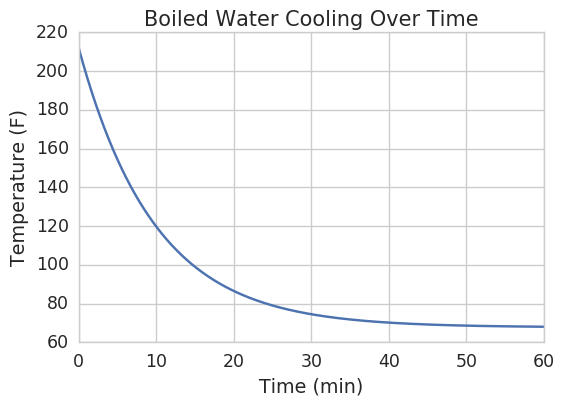

In [8]:
T = 373.  # boiling temperature in Kelvin
T_a = 293.  # room temperature in Kelvin

def cooling_eqn(r, t):
    return (T_a + (T - T_a) * np.exp(-r * t)) * 9./5. - 459.67  # returns a temperature in Fahrenheit

x = np.array(range(3600))

cooling_plot = plt.plot(x / 60., cooling_eqn(r, x))
plt.title('Boiled Water Cooling Over Time')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (F)')
plt.show()

### Other Systems###

The variables in our system have differing effects on the rate of cooling of boiling water. Some of those effects are explored below.

#### Water Volume####

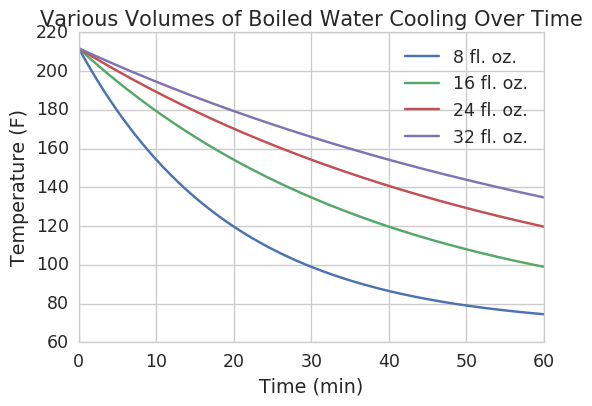

In [9]:
c_p = 4219
h = 39.4705048278

def r_func(h, A, m, c_p):
    return (h * A) / (m * c_p)

T = 373.  # boiling temperature in Kelvin
T_a = 293.  # room temperature in Kelvin

def cooling_eqn(r, t):
    return (T_a + (T - T_a) * np.exp(-r * t)) * 9./5. - 459.67  # returns a temperature in Fahrenheit

for i in range(8, 40, 8):
    x = np.array(range(3600))
    water_vol_local = float(i) * 2.95735296 * 10**-5
    m = water_vol_local * 958.4
    h_w = 3. * water_vol_local / (pi * (r1**2 + r1 * r2 + r2**2))
    a = pi * (r1 + r2) * sqrt((r1 - r2)**2 + h_w**2)
    r_local = r_func(h, area, m, c_p)
    plt.plot(x / 60., cooling_eqn(r_local, x), label='{} fl. oz.'.format(i))
    plt.legend()
    
plt.title('Various Volumes of Boiled Water Cooling Over Time')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (F)')
plt.show()

As evidenced by the graph, the lower the amount of water, the faster the rate of cooling. This makes sense conceptually, as lower volumes have a proportionally higher surface area.

#### Heat Transfer Coefficient $h$####

These transfer coefficients are hypothetical, but the aim of this section is to illustrate what a direct and large effect the kettle material has on heat transfer rate.

In [ ]:
h1 = 5.
h2 = 10.
h3 = 100.
for i in (h1, h2, h, h3):
    x_local = np.array(range(18000))
    r_local = r_func(i, area, m, c_p)
    plt.plot(x_local / 60., cooling_eqn(r_local, x_local), label='$h = {}$'.format(i))
    plt.legend()
    
plt.title('Boiled Water Cooling Over Time in Kettles of Various Materials')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (F)') 
plt.show()

This graph's timeline has been extended to 5 hours to show just how slow cooling can be in certain situations.

## The Optimal Brewing Temperature##

To make this model very user-friendly, widgets are used to aid the user in inputting the optimal brewing temperature. The user has two options: they can either input a type of tea or a specific brewing temperature. The temperatures for each type of tea are stored in a Python dictionary, meaning that each type is linked to its own unique brewing temperature. The brewing temperature that the user inputs is then stored for later use.

In [10]:
# the dictionary that stores tea types
tea_dict = {' Select Type of Tea': False, '- Black': 200., '- Blooming': 180., '- Green': 175., 
            '- Herbal': 208., '- Mate': 208., '- Oolong': 195., '- Rooibos': 208., '- White': 175.  
}

box_layout = widgets.Layout(display='flex',
                    flex_flow='column',
                    align_items='stretch',
                    width='50%')
get_brew_temp = widgets.Box(layout=box_layout)  # get_brew_temp is a 'parent' widget. Allows all the widgets to be displayed at once.
tea_type = widgets.Dropdown( options=tea_dict, description='What type of tea are you having?')  
confirm_brew_temp = widgets.Button(description='Ok')  # confirms tea type

specific_brew_temp = widgets.Button(  # allows the user to input a specific temperature
    description='other temperature'
)  
get_specific_temp = widgets.BoundedFloatText(max=212.0, description='Temperature (F): ')  # where the user inputs the temperature
ok_2 = widgets.Button(description='Ok')  # confirms the specific brewing temperature
input_temp = widgets.Box(  # links the two above
    visible=False, 
    children=[get_specific_temp, ok_2]
)
get_brew_temp.children = [tea_type, confirm_brew_temp, specific_brew_temp, input_temp]
display(get_brew_temp)  # displays the widgets all together

def ok_click(ok):
    print 'Your optimal brewing temperature is {} F.'.format(tea_type.value)
    global brew_temp
    brew_temp = tea_type.value

confirm_brew_temp.on_click(ok_click)

def specific_temp_toggle(yes):  # conditional that does not display the specific input prompt without user click
    if yes:
        input_temp.visible = True

specific_brew_temp.on_click(specific_temp_toggle)

def ok_2_click(ok_2):
    print 'Your optimal brewing temperature is {} F.'.format(get_specific_temp.value)
    global brew_temp 
    brew_temp = get_specific_temp.value
    
ok_2.on_click(ok_2_click)

### Graphing the Optimal Temperature###

The optimal temperature appears as a horizontal line on our graph. It intersects with our cooling curve at a certain time.

In [ ]:
x = np.array(range(1800))
cooling_plot = plt.plot(x / 60., cooling_eqn(r, x))
brew_temp_list = [brew_temp] * 1800
brew_temp_line = plt.plot(x / 60., brew_temp_list)
plt.title('Boiled Water Cooling Over Time, with Optimal Temperature')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (F)') 
plt.show()

### Optimization###

The last step is to find the intersection by minimizing the distance between the two lines. This uses the distance formula, $d = \sqrt{x^2 + y^2}$, and an optimization tool called ```scipy.optimize.minimize```. I apply a constraint to the optimization, essentially telling the minimization function that it can only choose from values that are already on the cooling curve.

In [ ]:
def opt_cooling(x):
    return (T_a + (T - T_a) * np.exp(-r * x[0])) * 9./5. - 459.67 - x[1]  # a function that creates a minimum at the intersection

def dist(x1, x2):
    return sqrt(np.sum((x1 - x2)**2))  # the distance formula

def obj(x):
    return dist(x[1], brew_temp)

constraint = {'type': 'eq', 'fun': opt_cooling}

wait_time = scipy.optimize.minimize(obj, x0=[300., brew_temp], bounds=[(0., 100000.), (67., 500.)], constraints=constraint)
print wait_time

if wait_time.x[0] <= 60.:
    wait_time_display = wait_time.x[0]
    wait_time_units = 'seconds'
elif wait_time.x[0] <= 3600.:
    wait_time_display = wait_time.x[0] / 60.
    wait_time_units = 'minutes'
else:
    wait_time_display = wait_time.x[0] / 3600.
    wait_time_units = 'hours'

print 'You should wait {:.3} {} before steeping your tea. \n'.format(wait_time_display, wait_time_units)

x = np.array(range(1800))
brew_temp_list = [brew_temp] * 1800
cooling_plot = plt.plot(x / 60., cooling_eqn(r, x))
brew_temp_line = plt.plot(x / 60., brew_temp_list)
plt.plot(wait_time.x[0] / 60., wait_time.x[1], marker='*', markersize=20., color='#FFD700')
plt.title('Boiled Water Cooling Over Time')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (F)')
plt.show()

## Final Result and Complete Program##

Printed above is the final result of the program. The wait time is clearly outlined and the gold star on the graph highlights the intersection between the two curves. The complete program combined into one cell is below, and features a much more compact output and some reshuffling of functions to alleviate flow issues.

In [ ]:
# imports
from IPython.html import widgets
from IPython.display import display
from math import exp, sqrt, pi
import scipy.optimize
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set_context('talk', font_scale=1.25)
seaborn.set_style('whitegrid')

# Calculating h #

k = .54
h_mug = 4.5 * .0254  # height in meters
r_mug = 1.5 * .0254  # radius in meters

A = pi * h_mug * r_mug
h = k / A

# Getting the Optimal Temperature #

# the dictionary that stores tea types
tea_dict = {' Select Type of Tea': False, '- Black': 200., '- Blooming': 180., '- Green': 175., 
            '- Herbal': 208., '- Mate': 208., '- Oolong': 195., '- Rooibos': 208., '- White': 175.  
}

get_brew_temp = widgets.Box(layout=box_layout)  # get_brew_temp is a 'parent' widget. Allows all the widgets to be displayed at once.
tea_type = widgets.Dropdown(  # drop-down menu
    options=tea_dict, 
    description='What type of tea are you having?'
)  
confirm_brew_temp = widgets.Button(description='Ok')  # confirms tea type

specific_brew_temp = widgets.Button(  # allows the user to input a specific temperature
    description='other temperature'
)  
get_specific_temp = widgets.BoundedFloatText(max=212.0, description='Temperature (F): ')  # where the user inputs the temperature
ok_2 = widgets.Button(description='Ok')  # confirms the specific brewing temperature
input_temp = widgets.Box(  # links the two above
    visible=False, 
    children=[get_specific_temp, ok_2]
)
get_brew_temp.children = [tea_type, confirm_brew_temp, specific_brew_temp, input_temp]
display(get_brew_temp)  # displays the widgets all together

def ok_click(ok):
    global brew_temp
    brew_temp = tea_type.value
    get_water_vol.visible = True
    ok_vol.visible = True

confirm_brew_temp.on_click(ok_click)

def specific_temp_toggle(yes):  # conditional that does not display the specific input prompt without user click
    if yes:
        input_temp.visible = True

specific_brew_temp.on_click(specific_temp_toggle)

def ok_2_click(ok_2):
    global brew_temp 
    brew_temp = get_specific_temp.value
    get_water_vol.visible = True
    ok_vol.visible = True
    
ok_2.on_click(ok_2_click)

# Getting the Water Volume

r1 = 3.5 * .0254  # lower kettle radius in meters
r2 = 1.5 * .0254  # upper kettle radius in meters

get_water_vol = widgets.BoundedFloatText(visible=False, max=56., description='How much tea are you making? (fl. oz.): ')
ok_vol = widgets.Button(value=False, visible=False, description='Ok')
display(get_water_vol)
display(ok_vol)

def confirm_water_vol(vol):
    water_vol_oz = get_water_vol.value
    global water_vol
    water_vol = water_vol_oz * 2.95735296 * 10**-5  # converts volume to m^3
    global m
    m = water_vol * 958.4
    h_w = 3. * water_vol / (pi * (r1**2 + r1 * r2 + r2**2))
    global area
    area = pi * (r1 + r2) * sqrt((r1 - r2)**2 + h_w**2)
    
ok_vol.on_click(confirm_water_vol)

# r Calculation #

c_p = 4219

def r_func(h, A, m, c_p):
    return (h * A) / (m * c_p)

def rest_of_program(ew):
    r = r_func(h, area, m, c_p)
    
    # Cooling Equation #

    T = 373.  # boiling temperature in Kelvin
    T_a = 293.  # room temperature in Kelvin

    def cooling_eqn(r, t):
        return (T_a + (T - T_a) * np.exp(-r * t)) * 9./5. - 459.67

    # Optimization #

    def opt_cooling(x):
        return (T_a + (T - T_a) * np.exp(-r * x[0])) * 9./5. - 459.67 - x[1]  # a function that creates a minimum at the intersection

    def dist(x1, x2):
        return sqrt(np.sum((x1 - x2)**2))  # the distance formula

    def obj(x):
        return dist(x[1], brew_temp)

    constraint = {'type': 'eq', 'fun': opt_cooling}

    wait_time = scipy.optimize.minimize(obj, x0=[300., brew_temp], bounds=[(0., 100000.), (67., 500.)], constraints=constraint)

    if wait_time.x[0] <= 60:
        wait_time_display = wait_time.x[0]
        wait_time_units = 'seconds'
    elif wait_time.x[0] <= 3600:
        wait_time_display = wait_time.x[0] / 60.
        wait_time_units = 'minutes'
    else:
        wait_time_display = wait_time.x[0] / 3600.
        wait_time_units = 'hours'
    print 'You should wait {:.3} {} before steeping your tea. \n'.format(wait_time_display, wait_time_units)
    x = np.array(range(1800))
    brew_temp_list = [brew_temp] * 1800
    cooling_plot = plt.plot(x / 60., cooling_eqn(r, x))
    brew_temp_line = plt.plot(x / 60., brew_temp_list)
    plt.plot(wait_time.x[0] / 60., wait_time.x[1], marker='*', markersize=20., color='#FFD700')
    plt.title('Boiled Water Cooling Over Time')
    plt.xlabel('Time (min)')
    plt.ylabel('Temperature (F)')
    plt.show()
    
ok_vol.on_click(rest_of_program)

## Citations##

https://en.wikipedia.org/wiki/Convective_heat_transfer#Newton.27s_law_of_cooling

http://www.engineeringtoolbox.com/overall-heat-transfer-coefficients-d_284.html

http://www.engineeringtoolbox.com/thermal-conductivity-d_429.html

http://www.engineeringtoolbox.com/overall-heat-transfer-coefficient-d_434.html

http://www.target.com/p/aroma-hot-h20-x-press-7-cup-stainless-steel-electric-kettle/-/A-13795316

http://www-ucjf.troja.mff.cuni.cz/dolejsi/outreach/sedlacek_ajp.pdf

http://nbviewer.ipython.org/github/minrk/ipython/tree/master/examples/Interactive%20Widgets/